In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing training and test data

In [169]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')

data = pd.concat([train_df, test_df], axis=0)
data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

Q1: In training set, which features are available?


'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Q2: In training set, which features are categorical?

'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

In [5]:
train_df.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Q3: In training set, which features are numerical(e.g., discrete, continuous, or time series based)?

'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'

In [6]:
train_df.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Q4: In training set, which features are mixed data types?

Ticket

In [7]:
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Q5: In training set, which features contain blank, null or empty values? In test set, which features contain blank, null or empty values?

train columns: ['Age', 'Cabin', 'Embarked']
test columns: ['Age', 'Fare', 'Cabin']

In [180]:
#Finding all columns with null in training
print('train columns:', train_df.columns[train_df.isna().any()])

#Finding all columns with null in testing
print('test columns:',test_df.columns[test_df.isna().any()])

train columns: Index(['Cabin', 'Embarked', 'FareBand'], dtype='object')
test columns: Index(['Age', 'Fare', 'Cabin'], dtype='object')


Q6: In training set, what are the data types(e.g., integer, floats or strings)for various features?

PassengerId      int64

Survived         int64

Pclass           int64

Name            object

Sex             object

Age            float64

SibSp            int64

Parch            int64

Ticket          object

Fare           float64

Cabin           object

Embarked        object

In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Q7: To understand the distribution of numerical feature values across the samples, please list the properties, including count, mean, std, min, 25% percentile, 50% percentile, 75% percentile, max, of numerical features?


SHOWN IN CODE

In [10]:
train_df.select_dtypes(include=['int64', 'float64']).describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Q8: To understand the distribution of categorical features, we define:  count is the total number of categorical values per column; unique is the total number of unique categorical values per column; top is the most frequent categorical value; freq is the total number of the most frequent categorical value. Please list the properties, including count, unique, top, freq,of categorical features? 


SHOWN IN CODE


In [11]:
train_df.select_dtypes(include=['object', 'category']).describe()

Name   Sex  Ticket        Cabin Embarked
count               891   891     891          204      889
unique              891     2     681          147        3
top     Hart, Mr. Henry  male  347082  C23 C25 C27        S
freq                  1   577       7            4      644

Q9: Can you observe significant correlation (average survivied ratio>0.5) among the group of Pclass=1and Survived? 
Yes, significant correlation is seen.

If Pclass has significant correlation with Survivied, we should include this feature in the predictivemodel. Based on your computation, will you include this feature in the predictive model? Yes, I would add this feature to my model.



In [70]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

Q10: Are Women (Sex=female) were more likely to have survived?
Yes

In [71]:
women = train_df[train_df['Sex'] == 'female']
women_survived = women[women['Survived'] == 1]
print('Number of women that survived: ', len(women_survived))


men = train_df[train_df['Sex'] == 'male']
men_survived = men[men['Survived'] == 1]
print('Number of men that survived: ', len(men_survived))

train_df[['Sex', 'Survived']].groupby('Sex').mean()

Number of women that survived:  233
Number of men that survived:  109


Survived
Sex             
female  0.742038
male    0.188908

Q11: Let us start by understanding correlations between a numeric feature (Age) and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (e.g., infants, old). Please plot the histogramsbetween ages and Survived (Figure1 is an example), and answer the following questions: 

•Do infants (Age <=4) have high survival rate?
High probability for survivability

•Do oldest passengers (Age = 80) survive?
Most did survive

•Do large number of 15-25 year olds not survive?
Yes, a large number of 15-25 year olds did not survive.

Based on your analysis of the figures, 

•Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)
Yes, we should. Age shows an indicative distribution.

•Should we should band age groups? No

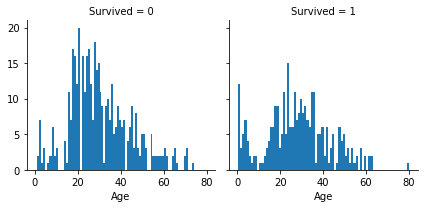

In [87]:
sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Age', bins=80);

Q12: We can combine three features(age, Pclass, and survivied)for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Please plot the plot using python, and answer the following questions: 

•Does Pclass=3 havemost passengers, however most did not survive?
True

•Do infant passengers in Pclass=2 and Pclass=3 mostly survive?
Yes

•Do most passengers in Pclass=1 survive?
Yes

•Does Pclass varyin terms ofAge distribution of passengers?
Yes, Pclass 1 had older and Pclass 3 had more younger passengers

•Should we consider Pclass for model training?
Yes, Pclass is a good predictive feature for survivability.

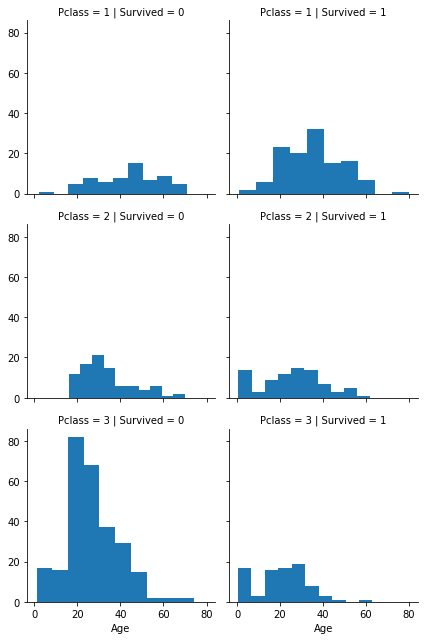

In [90]:
pas = sns.FacetGrid(train_df, col='Survived', row='Pclass').map(plt.hist, 'Age')

Q13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare 
And answer the following questions: 
        
•Do higher fare paying passengers have better survival?
Seem to make a difference in survivability only on Embarked C

•Should we consider banding fare feature?
Yes

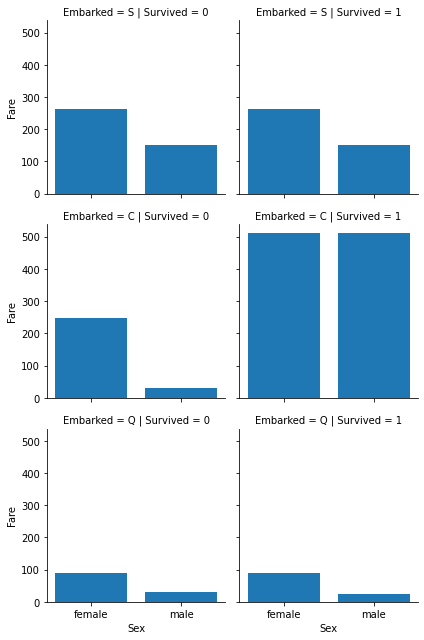

In [101]:
sns.FacetGrid(train_df, col='Survived', row='Embarked').map(plt.bar, 'Sex', 'Fare');

Q14: What is the rate of duplicates for the Ticket feature? 
681 duplicates which may mean one ticket number was assigned per party.

Is there a correlation between Ticket and survival?
Does not seem to be correlated

Should we drop the Ticket feature?
Yes

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64


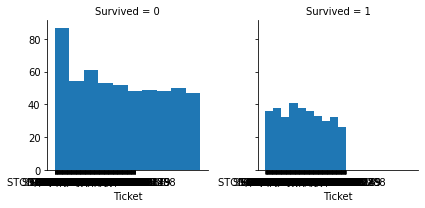

In [122]:
dups = train_df.pivot_table(index = ['Ticket'], aggfunc ='size')
print(dups)
sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Ticket');

Q15: Is the Cabin feature complete? 
No it is not

How many null values there are in the Cabin featuresof the combined dataset of training and test dataset? 
There are 1014 null values

Should we drop the Cabin feature?
Yes, we should drop it. Too much missing data

In [130]:
len(data[data['Cabin'].isna()])

1014

Q16: We can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,please convert Sex feature to a new feature called Gender where female=1 and male=0.

In [132]:
from sklearn.preprocessing import LabelBinarizer

label = LabelBinarizer()
train_df['Gender'] = label.fit_transform(train_df['Sex'])
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Gender  
0        0         A/5 21171   7.2500   NaN        S       1  
1        0          PC 17599  71.2833   C85        C       0  
2        0  STON/O2. 3101282   7.9250   NaN        S       0  
3        0            113803  53.1000  C123        S       0  
4        0            373450   8.0500   NaN        S       1  
..     ...               ...      ...   ...      ...     ...  
886      0            211536  13.0000   NaN        S       1  
887      0            112053  30.0000   B42        S       0  
888      2        W./C. 6607  23.4500   NaN        S       0  
889      0            111369  30.0000  C148        C       1  
890      0            370376   7.7500   NaN        Q       1  

[891 rows x 13 columns]

Q17: We start estimating and completing features with missing or null values. We will first do this for the Age feature.We can consider three methods to complete a numerical continuous feature. A simple way is to generate random numbers between mean and standard deviation.More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithmto select the top-K most similar data points, and then use the top-Kmost similar data points to impute themissing values of ages.  

In [178]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

train_df['Age'] = imputer.fit_transform(pd.DataFrame(train_df['Age'])).round(decimals=0)

#Check if any NaN are left
train_df['Age'].isna().any()

False

Q18: Complete a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences.

In [156]:
cmn_occ = train_df['Embarked'].mode()[0]

train_df['Embarked'] = train_df['Embarked'].fillna(cmn_occ)

#Checks if any NaN in Embarked are left
train_df['Embarked'].isna().any()

False

Q19: Complete and convert a numeric feature. Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.

In [164]:
fare_mf = test_df['Fare'].mode()[0]

test_df['Fare'] = test_df['Fare'].fillna(fare_mf)

#Check if fare has NaN left
test_df['Fare'].isna().any()

False

Q20: Convert the Fare feature to ordinal values based on the FareBanddefined follows:

In [174]:
train_df['FareBand'] = pd.cut(train_df['Fare'], bins=[-0.001, 7.91, 14.454, 31.0, 512.329], labels=[0,1,2,3])

In [175]:
train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean()

Survived
FareBand          
0         0.197309
1         0.308756
2         0.445415
3         0.575342

Additional Questions: 

•Approximately how many hours did you spend on this assignment?
About 3 hours

•Which aspects of this assignment did you find most challenging? Were there any significant stumbling blocks?
I found the coding of the visualizations the most challenging to fit the structure.

•Which aspects of this assignment did you like? Is there anything you would have changed?
I enjoyed the questions it asked based on the visualizations. I would have added more open ended questions for us to look more into the data. 